In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/DAV_assignment(Sheet1) (1).csv')
df

,S. No.,Name of the Organization,Salary Per Annum (Rs. In Lakhs),Date of Test/ Interview,ECE,CSE,EEE,IT,MECH,PROD,CIVIL,CHEM,BIO- TECH,Unnamed: 13
0,1.0,AISHWARYA TELECOM,1.8,18.06.2009,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,CORDYS,3.5,26.06.2009,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,AWAYA,4,28.06.2009,1,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,VINISOFT,1.44,03.07.2009,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
4,5.0,HONEYWELL,3.25,09.07.2009,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,978.0,HIL,4.5,12.01.2023,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
978,979.0,GE Appliances,8.0,16.01.2023,NaN,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
979,980.0,Synopsys PPO,19.3,17.01.2023,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
980,981.0,Invesco,10.0,18.01.2023,0,2,NaN,1,1,0,0,2,NaN,NaN


In [ ]:
df.isnull().sum()

,0
S. No.,1
Name of the Organization,5
Salary Per Annum (Rs. In Lakhs),8
Date of Test/ Interview,2
ECE,550
CSE,421
EEE,596
IT,438
MECH,670
PROD,728


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   S. No.                           981 non-null    float64
 1   Name of the Organization         977 non-null    object 
 2   Salary Per Annum (Rs. In Lakhs)  974 non-null    object 
 3   Date of Test/ Interview          980 non-null    object 
 4   ECE                              432 non-null    object 
 5   CSE                              561 non-null    object 
 6   EEE                              386 non-null    object 
 7   IT                               544 non-null    object 
 8   MECH                             312 non-null    object 
 9   PROD                             254 non-null    object 
 10  CIVIL                            204 non-null    object 
 11  CHEM                             195 non-null    object 
 12  BIO- TECH             

In [ ]:
df=df.fillna(0)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df=df.drop('Unnamed: 13',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   S. No.                           982 non-null    float64
 1   Name of the Organization         982 non-null    object 
 2   Salary Per Annum (Rs. In Lakhs)  982 non-null    object 
 3   Date of Test/ Interview          982 non-null    object 
 4   ECE                              982 non-null    object 
 5   CSE                              982 non-null    object 
 6   EEE                              982 non-null    object 
 7   IT                               982 non-null    object 
 8   MECH                             982 non-null    object 
 9   PROD                             982 non-null    object 
 10  CIVIL                            982 non-null    object 
 11  CHEM                             982 non-null    object 
 12  BIO- TECH             

In [ ]:
df.isnull().sum()

,0
S. No.,0
Name of the Organization,0
Salary Per Annum (Rs. In Lakhs),0
Date of Test/ Interview,0
ECE,0
CSE,0
EEE,0
IT,0
MECH,0
PROD,0


In [ ]:
# Define department names
departments = ['ECE', 'CSE', 'EEE', 'IT', 'MECH', 'PROD', 'CIVIL', 'CHEM', 'BIO- TECH']

# Melt the data
df_long = df.melt(
    id_vars=['S. No.', 'Name of the Organization', 'Salary Per Annum (Rs. In Lakhs)', 'Date of Test/ Interview'],
    value_vars=departments,
    var_name='Department',
    value_name='Placement Count'
)

# Clean and prepare
df_long['Placement Count'] = pd.to_numeric(df_long['Placement Count'], errors='coerce')
df_long['Salary Per Annum (Rs. In Lakhs)'] = pd.to_numeric(df_long['Salary Per Annum (Rs. In Lakhs)'], errors='coerce')
df_long['Date'] = pd.to_datetime(df_long['Date of Test/ Interview'], errors='coerce', dayfirst=True)
df_long['Year'] = df_long['Date'].dt.year
df_long.dropna(subset=['Placement Count'], inplace=True)

1).Which department had the highest placements in the last 5 years?

Placements in Last 5 Years (All Departments):

CSE - 662 students
ECE - 637 students
IT - 459 students
MECH - 246 students
EEE - 211 students
CHEM - 101 students
CIVIL - 91 students
BIO- TECH - 57 students
PROD - 50 students

 Department with the highest placements:
CSE - 662 students


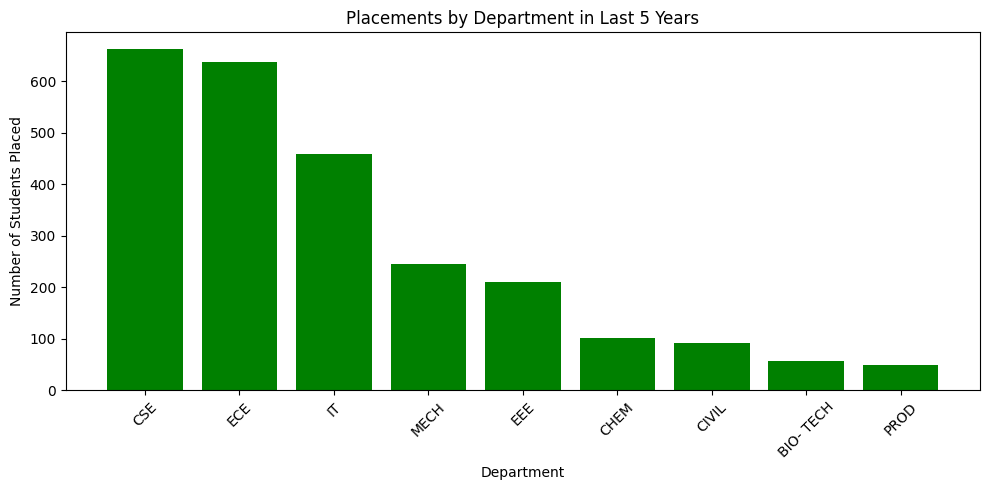

In [ ]:
# Filter for last 5 years
recent_years = df_long[df_long['Year'] >= (df_long['Year'].max() - 4)]

# Group by Department
placements_by_department = recent_years.groupby('Department')['Placement Count'].sum().sort_values(ascending=False)

# First print all departments
print("Placements in Last 5 Years (All Departments):\n")
for dept, count in placements_by_department.items():
    print(f"{dept} - {int(count)} students")

# Then print the department with the highest placements
top_department = placements_by_department.index[0]
top_count = int(placements_by_department.iloc[0])

print("\n Department with the highest placements:")
print(f"{top_department} - {top_count} students")

fig=plt.figure(figsize=(10,5))
plt.bar(placements_by_department.index, placements_by_department.values, color='green')
plt.title('Placements by Department in Last 5 Years')
plt.xlabel('Department')
plt.ylabel('Number of Students Placed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2.How have the total placements changed year over year?

Total Placements Year Over Year:

2009 - 84 students
2010 - 656 students
2011 - 560 students
2012 - 743 students
2013 - 219 students
2014 - 1066 students
2015 - 1288 students
2016 - 1321 students
2017 - 826 students
2018 - 1018 students
2019 - 1075 students
2020 - 649 students
2021 - 229 students
2022 - 497 students
2023 - 64 students


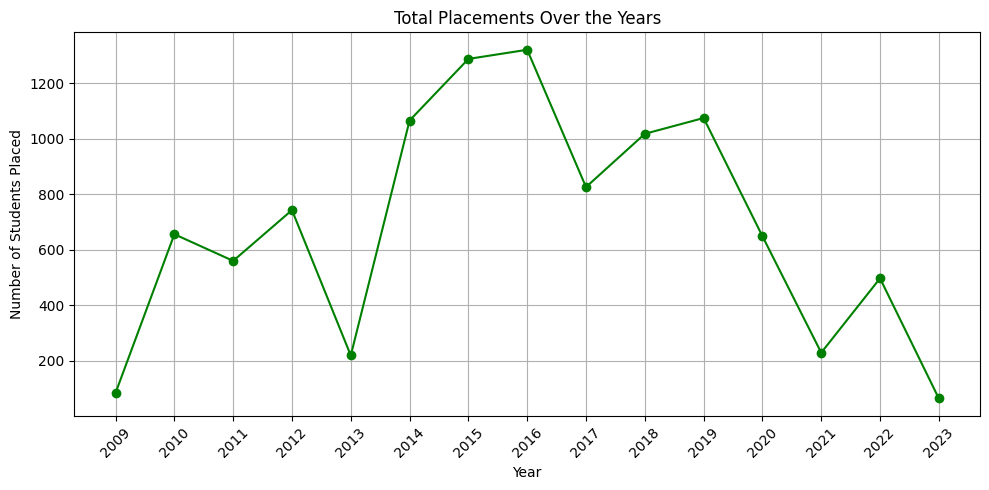

In [ ]:
# Group by year and sum placements
placements_per_year = df_long.groupby('Year')['Placement Count'].sum()

# Print total placements year by year
print("Total Placements Year Over Year:\n")
for year, count in placements_per_year.items():
    print(f"{int(year)} - {int(count)} students")
plt.figure(figsize=(10,5))
plt.plot(placements_per_year.index, placements_per_year.values, marker='o', linestyle='-', color='green')
plt.title('Total Placements Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Students Placed')
plt.grid(True)
plt.xticks(placements_per_year.index, rotation=45)
plt.tight_layout()
plt.show()

3.What is the average salary offered for CSE students?

Average salary offered for CSE students: ₹5.42 LPA


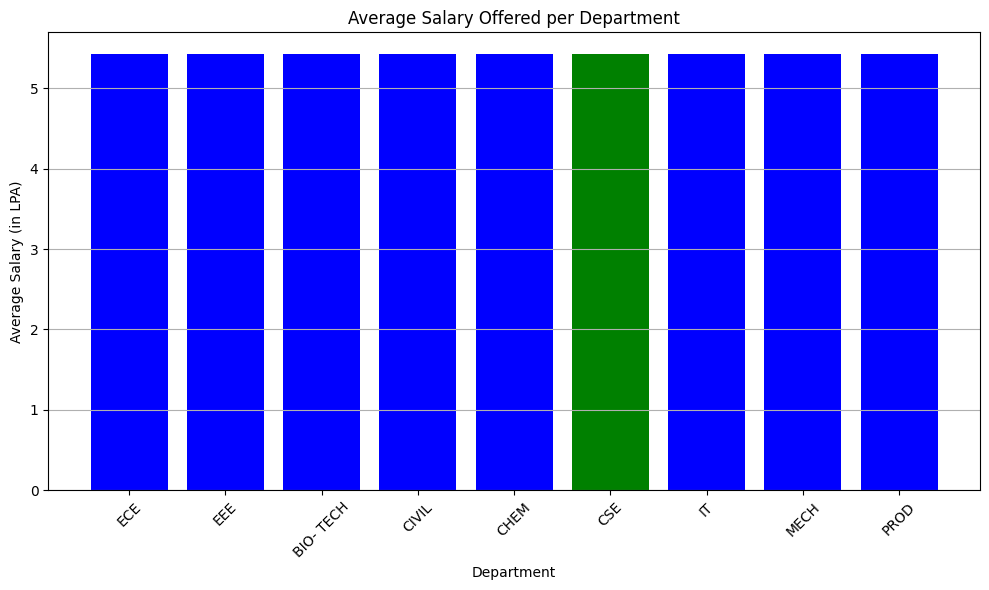

In [ ]:
# Filter only CSE department
cse_data = df_long[df_long['Department'] == 'CSE']

# Calculate average salary for CSE students
average_salary_cse = cse_data['Salary Per Annum (Rs. In Lakhs)'].mean()

# Print result
print(f"Average salary offered for CSE students: ₹{average_salary_cse:.2f} LPA")
# Group by department and calculate average salary
avg_salary_by_dept = df_long.groupby('Department')['Salary Per Annum (Rs. In Lakhs)'].mean().sort_values(ascending=False)
colors = ['green' if dept == 'CSE' else 'blue' for dept in avg_salary_by_dept.index]
# Plot
plt.figure(figsize=(10,6))
plt.bar(avg_salary_by_dept.index, avg_salary_by_dept.values, color=colors)
plt.title('Average Salary Offered per Department')
plt.xlabel('Department')
plt.ylabel('Average Salary (in LPA)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

4).Which companies recruited students from multiple departments?

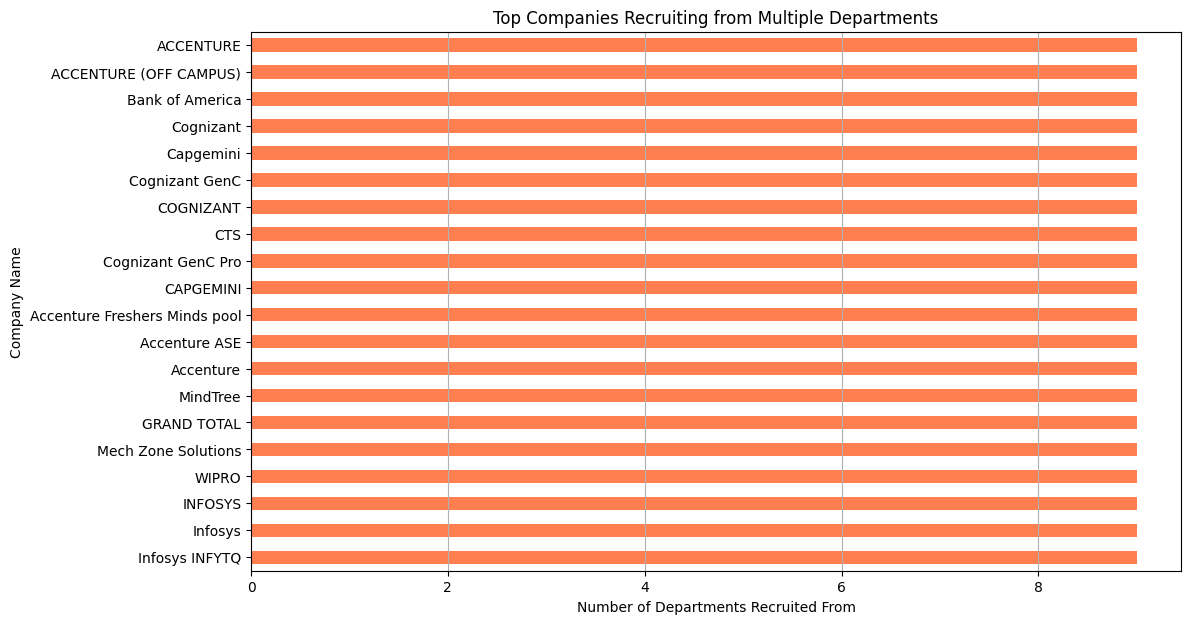

In [ ]:
# Keep only rows with actual placements
df_long = df_long[df_long['Placement Count'] > 0]

# Now, find companies recruiting from multiple departments
multi_dept_companies = df_long.groupby('Name of the Organization')['Department'].nunique()
multi_dept_companies = multi_dept_companies[multi_dept_companies > 1].sort_values(ascending=False)

# Display top 20
top_multi_dept = multi_dept_companies.head(20)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
top_multi_dept.plot(kind='barh', color='coral')
plt.title('Top Companies Recruiting from Multiple Departments')
plt.xlabel('Number of Departments Recruited From')
plt.ylabel('Company Name')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


5.How many students were placed in core vs. non-core roles?

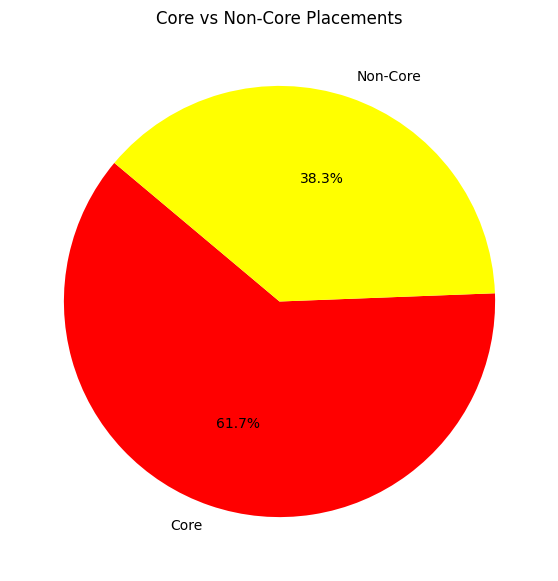

In [ ]:
# Define core and non-core branches
core_departments = ['ECE', 'EEE', 'MECH', 'PROD', 'CIVIL', 'CHEM', 'BIO- TECH']
non_core_departments = ['CSE', 'IT']

# Classify each row as Core or Non-Core
df_long['Category'] = df_long['Department'].apply(lambda x: 'Core' if x in core_departments else 'Non-Core')

# Sum placement counts
core_vs_noncore = df_long.groupby('Category')['Placement Count'].sum()

# Plot pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.pie(core_vs_noncore, labels=core_vs_noncore.index, autopct='%1.1f%%', startangle=140, colors=['red','yellow'])
plt.title('Core vs Non-Core Placements')
plt.show()

6.What is the highest package offered each year?

Year
2009.0     5.8
2010.0    10.5
2011.0    10.2
2012.0    10.5
2013.0     7.0
2014.0    12.0
2015.0    12.0
2016.0    18.0
2017.0    36.0
2018.0    39.0
2019.0    41.0
2020.0    25.0
2021.0    43.0
2022.0    45.6
2023.0    30.0
Name: Salary Per Annum (Rs. In Lakhs), dtype: float64


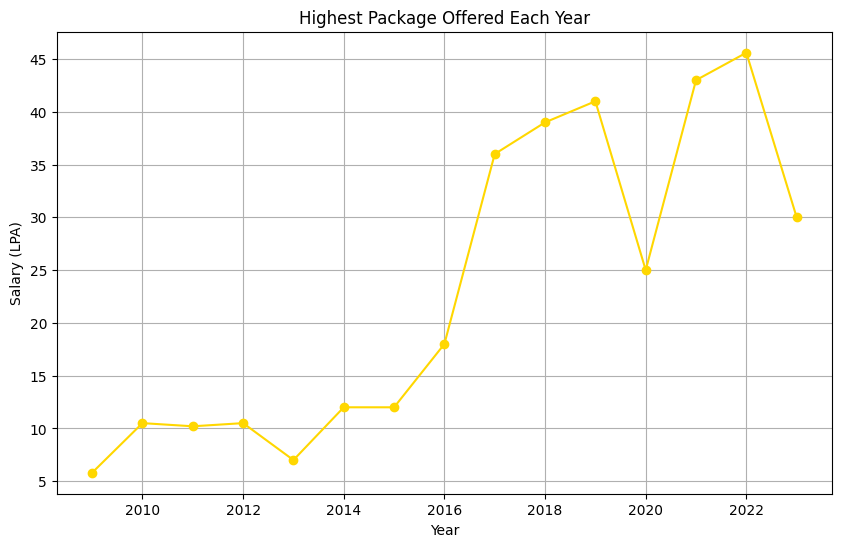

In [ ]:
# First, make sure salary and date are parsed
df['Salary Per Annum (Rs. In Lakhs)'] = pd.to_numeric(df['Salary Per Annum (Rs. In Lakhs)'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date of Test/ Interview'], errors='coerce', dayfirst=True)
df['Year'] = df['Date'].dt.year

# Find highest salary per year
highest_salary_per_year = df.groupby('Year')['Salary Per Annum (Rs. In Lakhs)'].max().dropna()

# Display table
print(highest_salary_per_year)

# Plot it
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(highest_salary_per_year.index, highest_salary_per_year.values, marker='o', color='gold')
plt.title('Highest Package Offered Each Year')
plt.xlabel('Year')
plt.ylabel('Salary (LPA)')
plt.grid(True)
plt.show()


7.How does ECE compare with CSE in terms of placements?

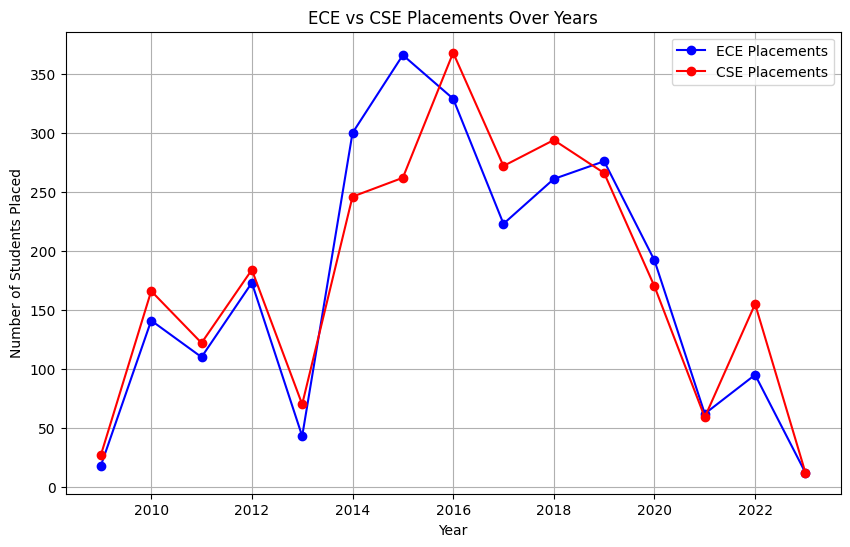

Total ECE Placements: 2601
Total CSE Placements: 2673


In [ ]:
# Assuming you are using your original wide-format df

# Make sure date and department counts are clean
df['Date'] = pd.to_datetime(df['Date of Test/ Interview'], errors='coerce', dayfirst=True)
df['Year'] = df['Date'].dt.year
df['ECE'] = pd.to_numeric(df['ECE'], errors='coerce').fillna(0).astype(int)
df['CSE'] = pd.to_numeric(df['CSE'], errors='coerce').fillna(0).astype(int)

# Group by Year and sum placements
dept_year = df.groupby('Year')[['ECE', 'CSE']].sum()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(dept_year.index, dept_year['ECE'], marker='o', label='ECE Placements', color='blue')
plt.plot(dept_year.index, dept_year['CSE'], marker='o', label='CSE Placements', color='red')
plt.title('ECE vs CSE Placements Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Students Placed')
plt.legend()
plt.grid(True)
plt.show()

# Bonus: Calculate total placements overall
total_ece = dept_year['ECE'].sum()
total_cse = dept_year['CSE'].sum()
print(f"Total ECE Placements: {total_ece}")
print(f"Total CSE Placements: {total_cse}")


8.Are there companies that recruit every year consistently?

In [ ]:
# Make sure date and companies are cleaned
df['Date'] = pd.to_datetime(df['Date of Test/ Interview'], errors='coerce', dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Name of the Organization'] = df['Name of the Organization'].str.strip()

# Create a pivot table: Companies vs Years
pivot = df.pivot_table(index='Name of the Organization', columns='Year', values='S. No.', aggfunc='count', fill_value=0)

# Find companies that have non-zero placement records for ALL years
# First, find all years present in data
all_years = df['Year'].dropna().unique()
total_years = len(all_years)

# Companies that have data for every year
consistent_companies = pivot[(pivot > 0).sum(axis=1) == total_years]

# Display results
print(f"Number of companies recruiting consistently every year: {len(consistent_companies)}")
print(consistent_companies.index.tolist())


Number of companies recruiting consistently every year: 0
[]


9.Find the company name which appears the maximum number of times (i.e., conducted the most drives)



Company Name -> Number of Times Appeared:

Name of the Organization
INFOSYS                      7
DELOITTE                     7
CAPGEMINI                    7
CAPITAL IQ                   7
ServiceNow                   6
                            ..
United Health Group (UHG)    1
ATOS                         1
MRF MBA                      1
Biological E.Limited         1
INVESO  (MBA)                1
Name: count, Length: 738, dtype: int64


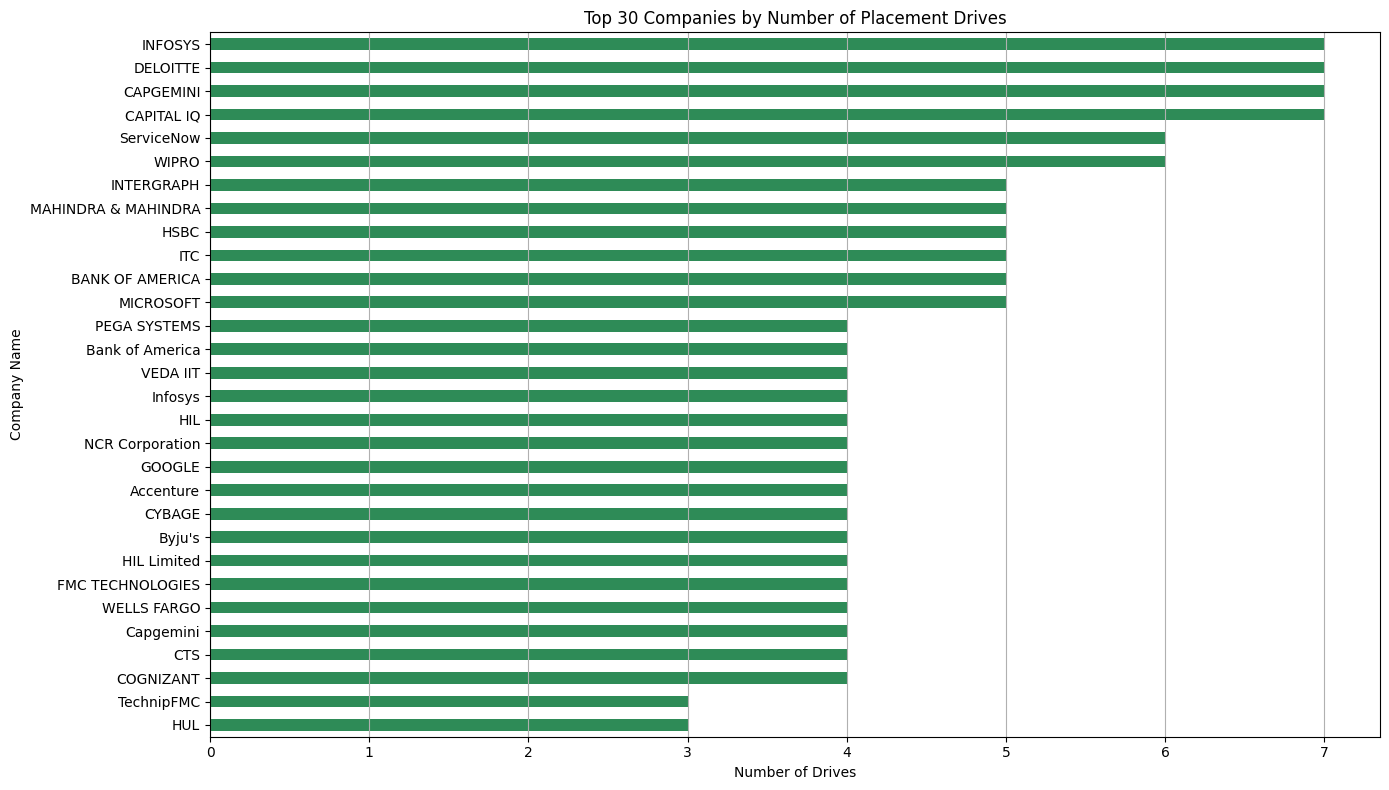

In [ ]:

# Assume df is already loaded and cleaned
df['Name of the Organization'] = df['Name of the Organization'].str.strip()
# Count appearances for all companies
company_appearance = df['Name of the Organization'].value_counts()
# Print the full list
print("Company Name -> Number of Times Appeared:\n")
print(company_appearance)
# Plot all companies (if too many, plot top 30 for readability)
top_n = 30  # you can increase this if needed
top_companies = company_appearance.head(top_n)
plt.figure(figsize=(14, 8))
top_companies.plot(kind='barh', color='seagreen')
plt.title(f'Top {top_n} Companies by Number of Placement Drives')
plt.xlabel('Number of Drives')
plt.ylabel('Company Name')
plt.gca().invert_yaxis()  # Highest on top
plt.grid(axis='x')
plt.tight_layout()
plt.show()


10.Which branch shows the best growth in placements over time?

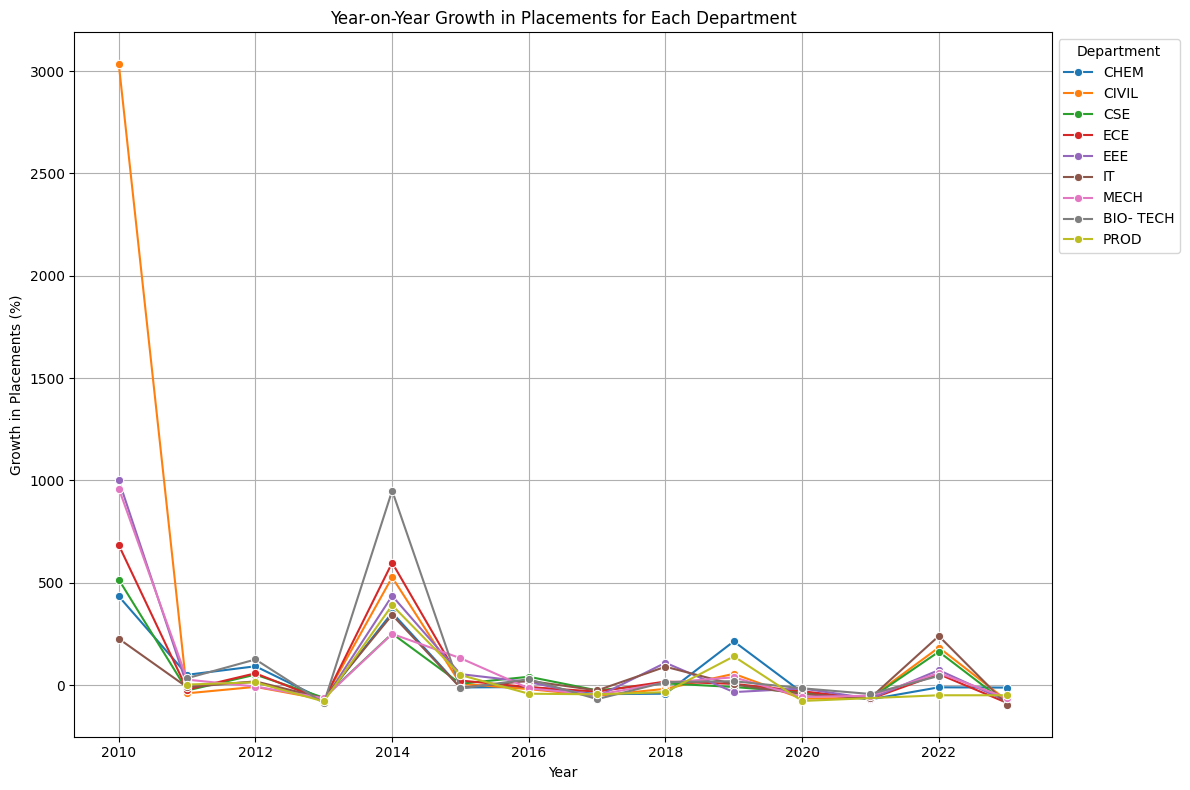

In [ ]:
# Group by Year and Department to calculate total placements per year
department_growth = df_long.groupby(['Year', 'Department'])['Placement Count'].sum().reset_index()

# Calculate the year-on-year growth for each department
department_growth['Growth'] = department_growth.groupby('Department')['Placement Count'].pct_change() * 100

# Plot the growth over time for each department
plt.figure(figsize=(12, 8))
sns.lineplot(data=department_growth, x='Year', y='Growth', hue='Department', marker='o')

# Customize the plot
plt.title('Year-on-Year Growth in Placements for Each Department')
plt.xlabel('Year')
plt.ylabel('Growth in Placements (%)')
plt.legend(title='Department', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
